### Himanshu Kesarvani - 11915018
### Chirag Sharma - 11915039

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from haversine import haversine, Unit
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
cab_data = pd.read_csv("train.csv")

In [3]:
cab_test_data = pd.read_csv("test.csv")

In [4]:
cap_data_copy = cab_data

In [5]:
cab_data.columns

Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE'],
      dtype='object')

In [6]:
cab_data.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [7]:
cab_data.dtypes

TRIP_ID           int64
CALL_TYPE        object
ORIGIN_CALL     float64
ORIGIN_STAND    float64
TAXI_ID           int64
TIMESTAMP         int64
DAY_TYPE         object
MISSING_DATA       bool
POLYLINE         object
dtype: object

In [8]:
cab_data.DAY_TYPE.unique()

array(['A'], dtype=object)

In [9]:
cab_data.shape

(1710670, 9)

In [10]:
cab_data.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.710670e+06,364770.000000,806579.000000,1.710670e+06,1.710670e+06
mean,1.388622e+18,24490.363018,30.272381,2.000035e+07,1.388622e+09
std,9.180944e+15,19624.290043,17.747840,2.112405e+02,9.180944e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.380731e+18,6593.000000,15.000000,2.000017e+07,1.380731e+09
50%,1.388493e+18,18755.000000,27.000000,2.000034e+07,1.388493e+09
75%,1.396750e+18,40808.000000,49.000000,2.000052e+07,1.396750e+09
max,1.404173e+18,63884.000000,63.000000,2.000098e+07,1.404173e+09


In [11]:
type(cab_data.ORIGIN_STAND.value_counts())

pandas.core.series.Series

In [12]:
number_of_origin_stands = cab_data.ORIGIN_STAND.value_counts()
frequency_from_each_stand = number_of_origin_stands.rename_axis('ORIGIN_STAND').reset_index(name="Frequency")

In [13]:
frequency_from_each_stand.ORIGIN_STAND = frequency_from_each_stand.ORIGIN_STAND.astype('int32')

## Getting Top 5 highest used cab stands

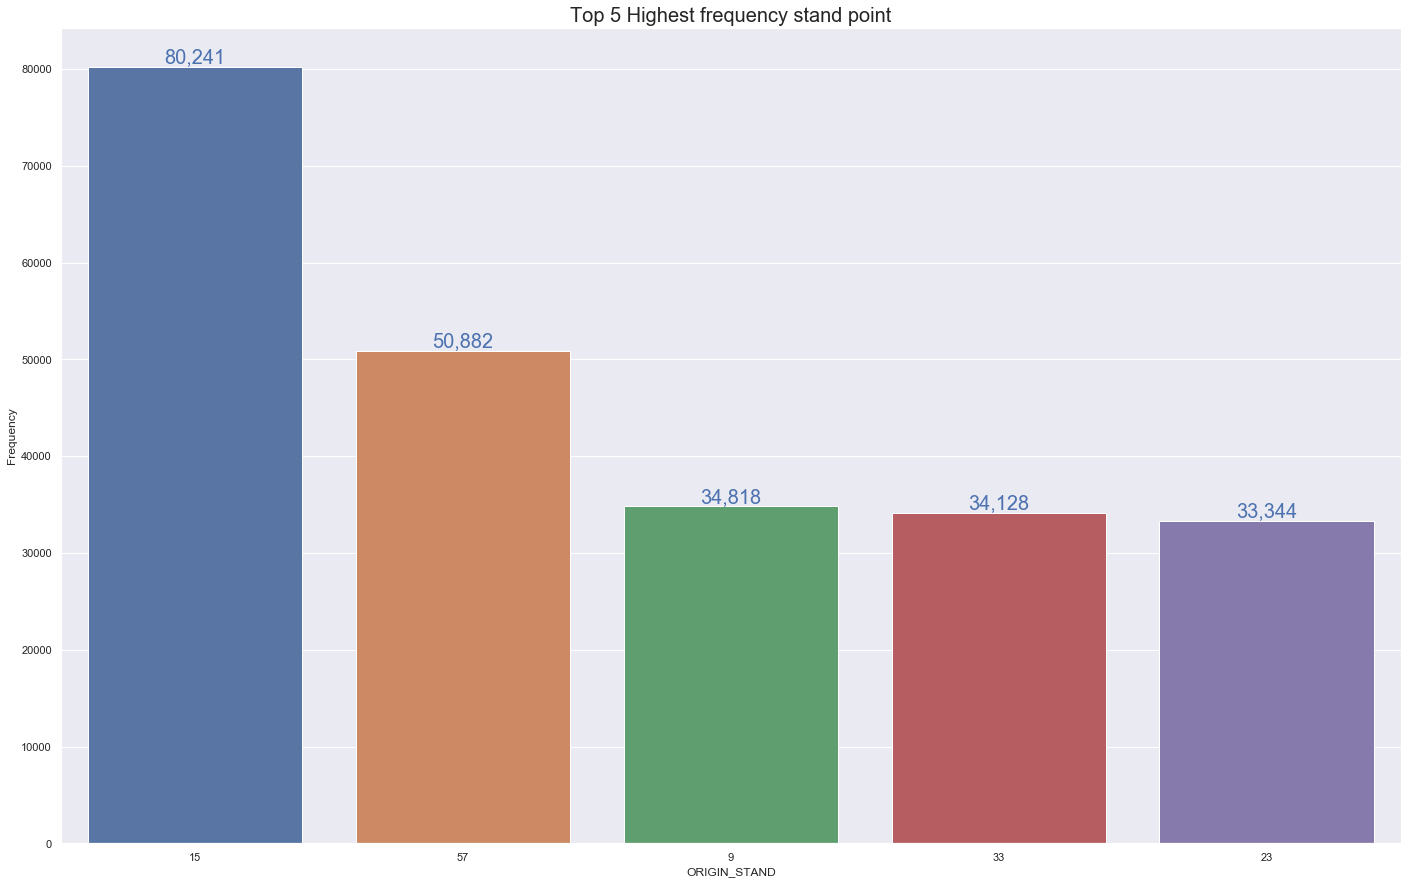

In [14]:
plt.figure(figsize=(24,15))
ax = sns.barplot(x="ORIGIN_STAND", y="Frequency", data=frequency_from_each_stand.head(), order=frequency_from_each_stand.head().ORIGIN_STAND)
ax.set_title("Top 5 Highest frequency stand point", size=20)
for i, v in enumerate(frequency_from_each_stand.head().Frequency.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', size=20, ha='center')
plt.savefig('foo.png')

## Getting Top 5 lowest used cab stands

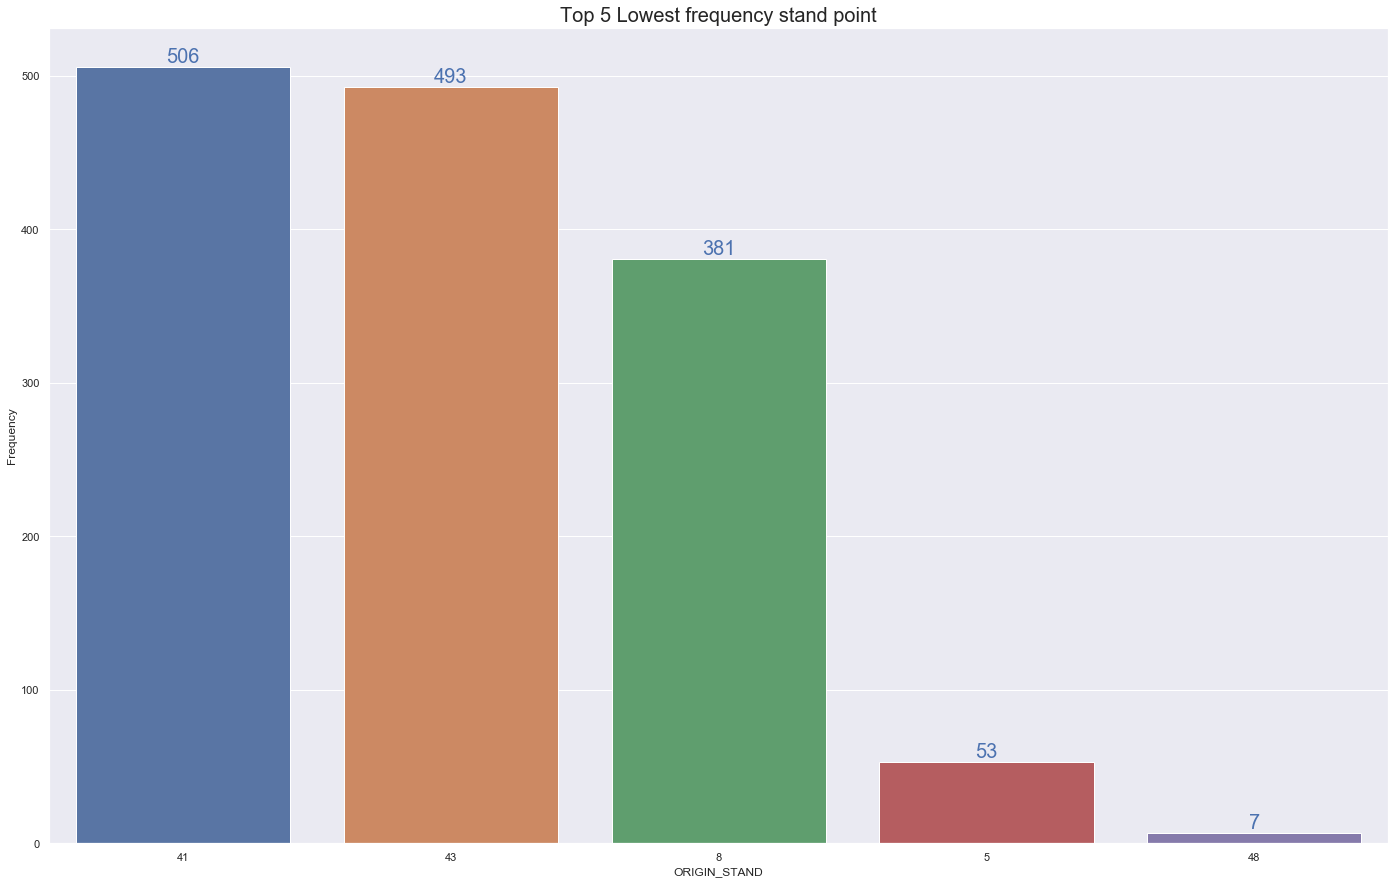

In [15]:
plt.figure(figsize=(24,15))
ax = sns.barplot(x="ORIGIN_STAND", y="Frequency", data=frequency_from_each_stand.tail(), order=frequency_from_each_stand.tail().ORIGIN_STAND)
ax.set_title("Top 5 Lowest frequency stand point", size=20)
for i, v in enumerate(frequency_from_each_stand.tail().Frequency.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', size=20, ha='center')

## Most cab used by different call type
* A if this trip was dispatched from the central; 
* B if this trip was demanded directly to a taxi driver on a specific stand; 
* C otherwise (i.e. a trip demanded on a random street).

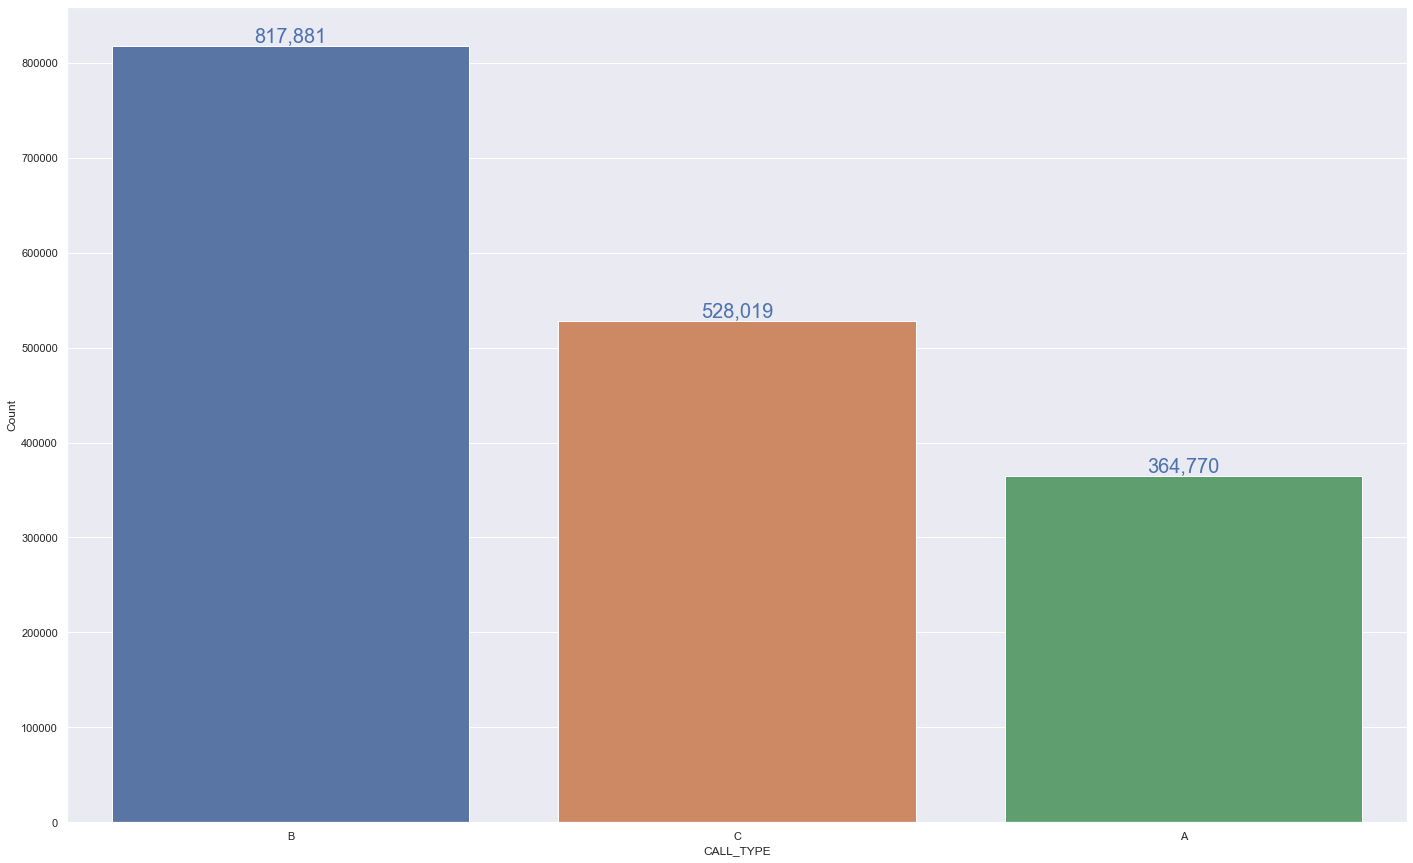

In [16]:
plt.figure(figsize=(24,15))
call_type_count = cab_data.CALL_TYPE.value_counts().rename_axis("CALL_TYPE").reset_index(name="Count")
ax = sns.barplot(x=call_type_count.CALL_TYPE, y=call_type_count.Count)
for i, v in enumerate(call_type_count.Count.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', size=20, ha='center')

In [17]:
origin_call_count = cab_data.ORIGIN_CALL.value_counts().rename_axis("ORIGIN_CALL").reset_index(name="Count")

In [18]:
origin_call_count.ORIGIN_CALL = origin_call_count.astype('int32')

In [19]:
top_10_origin_call = origin_call_count.head(10)

## Top 10 Phone id used for booking cabs

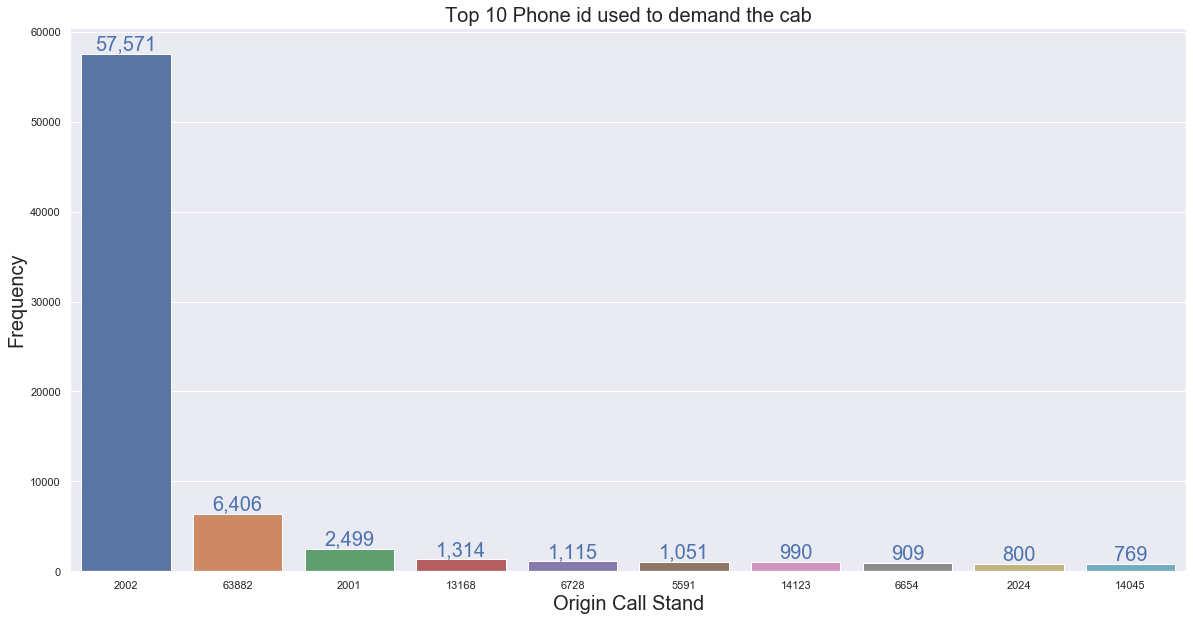

In [20]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=top_10_origin_call.ORIGIN_CALL, y=top_10_origin_call.Count, order = top_10_origin_call.ORIGIN_CALL)
ax.set_xlabel("Origin Call Stand", size = 20)
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Top 10 Phone id used to demand the cab", size = 20)
for i, v in enumerate(top_10_origin_call.Count.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', size=20, ha='center')

In [21]:
date_time_format = pd.DatetimeIndex(pd.to_datetime(cap_data_copy.TIMESTAMP, unit='s'))

## Converting train and test data Timestamp to week, day, month, hour, minute format

In [121]:
cap_data_copy['WEEK'] = date_time_format.week - 1
cap_data_copy['DAY'] = date_time_format.dayofweek
cap_data_copy['MONTH'] = date_time_format.month
cap_data_copy['HOUR'] = date_time_format.hour
cap_data_copy['MINUTE'] = date_time_format.minute
cap_data_copy["DATE_TIME"] = date_time_format
cap_data_copy["DAY NAME"] = date_time_format.weekday_name
cap_data_copy["YEAR"] = date_time_format.year
cap_data_copy["DATE"] = pd.to_datetime(date_time_format.date)

In [23]:
date_time_format_test = pd.DatetimeIndex(pd.to_datetime(cab_test_data.TIMESTAMP, unit='s'))

In [24]:
cab_test_data['WEEK'] = date_time_format_test.week - 1
cab_test_data['DAY'] = date_time_format_test.dayofweek
cab_test_data['MONTH'] = date_time_format_test.month
cab_test_data['HOUR'] = date_time_format_test.hour
cab_test_data['MINUTE'] = date_time_format_test.minute
cab_test_data["DATE_TIME"] = date_time_format_test

In [25]:
monthly_rides = cap_data_copy.MONTH.value_counts().rename_axis("MONTH").reset_index(name="Count")

## Frequency of cab booking over month, we can observe in month of May, October, June people are using more cabs

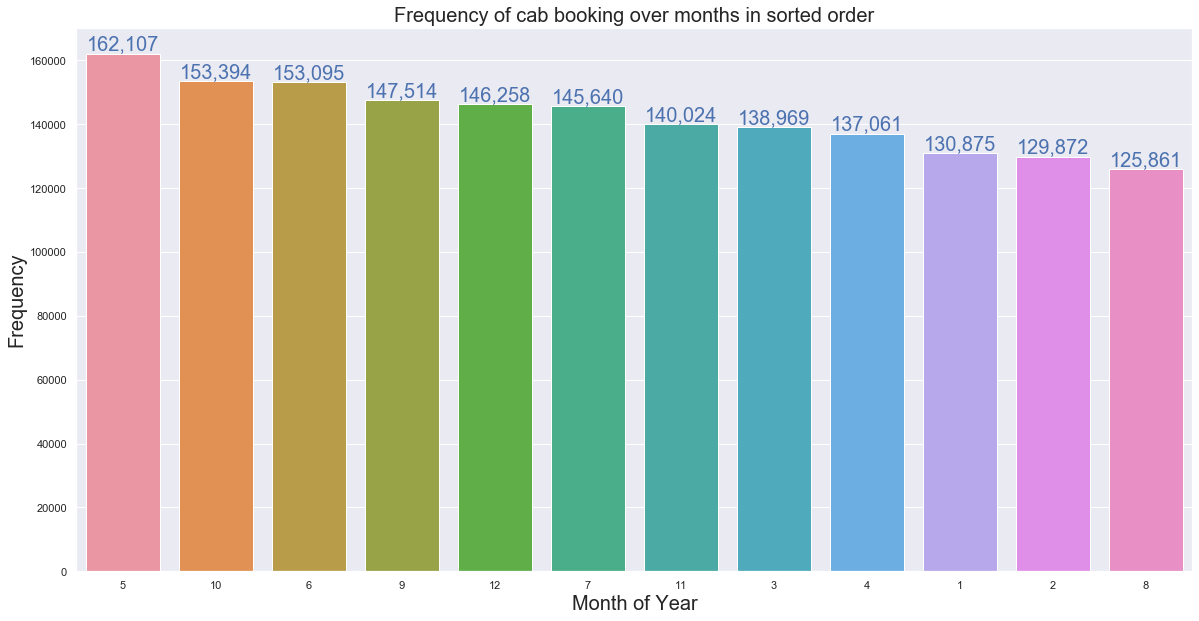

In [26]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=monthly_rides.MONTH, y=monthly_rides.Count, order = monthly_rides.MONTH)
ax.set_xlabel("Month of Year", size = 20)
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Frequency of cab booking over months in sorted order", size = 20)
for i, v in enumerate(monthly_rides.Count.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', size=20, ha='center')

As we can ovserve in above chart that "May", "June", "October", "December" month people are taking more taxis

## Frequency of cab booking day of the week, we can clearly observe people taking cabs more on Friday, and Saturday 

In [27]:
day_rides = cap_data_copy.DAY.value_counts().rename_axis("DAY").reset_index(name="Count")

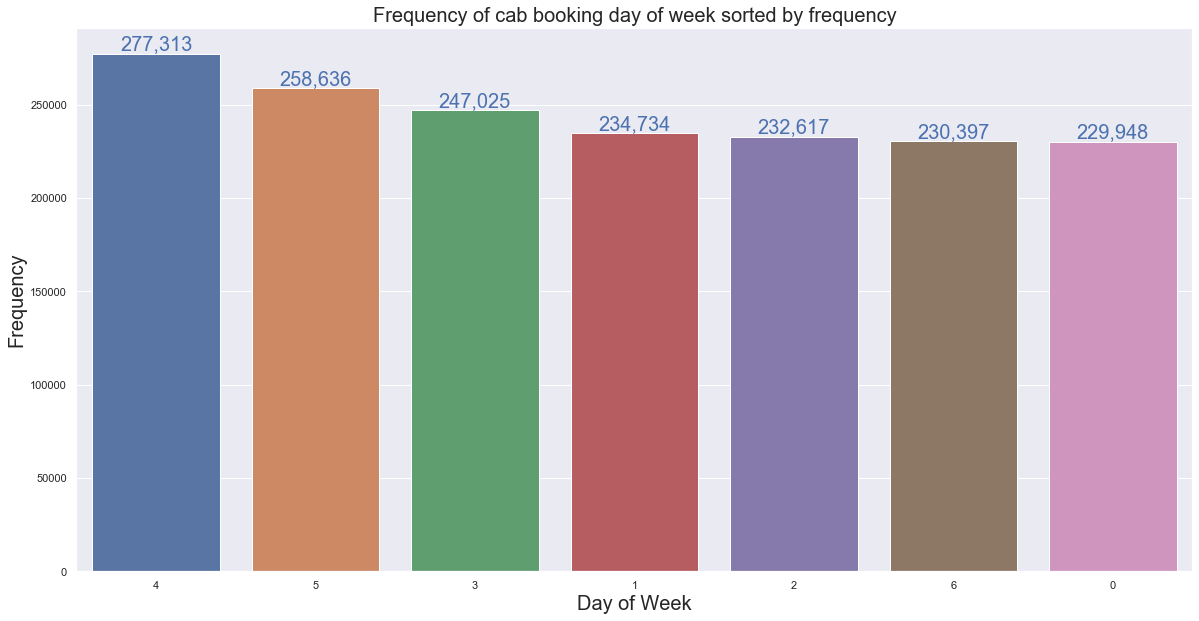

In [28]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=day_rides.DAY, y=day_rides.Count, order = day_rides.DAY)
ax.set_xlabel("Day of Week", size = 20)
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Frequency of cab booking day of week sorted by frequency", size = 20)

for i, v in enumerate(day_rides.Count.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', size=20, ha='center')

We can observe from above diagram that maximum ride taken on friday and saturday may be people are going for entertainment or travel plans

## Cab Frequency Hour of the day

In [29]:
hour_of_day = cap_data_copy.HOUR.value_counts().rename_axis("HOUR").reset_index(name="Count")
hour_of_day.Count = round(hour_of_day.Count/1000,1)

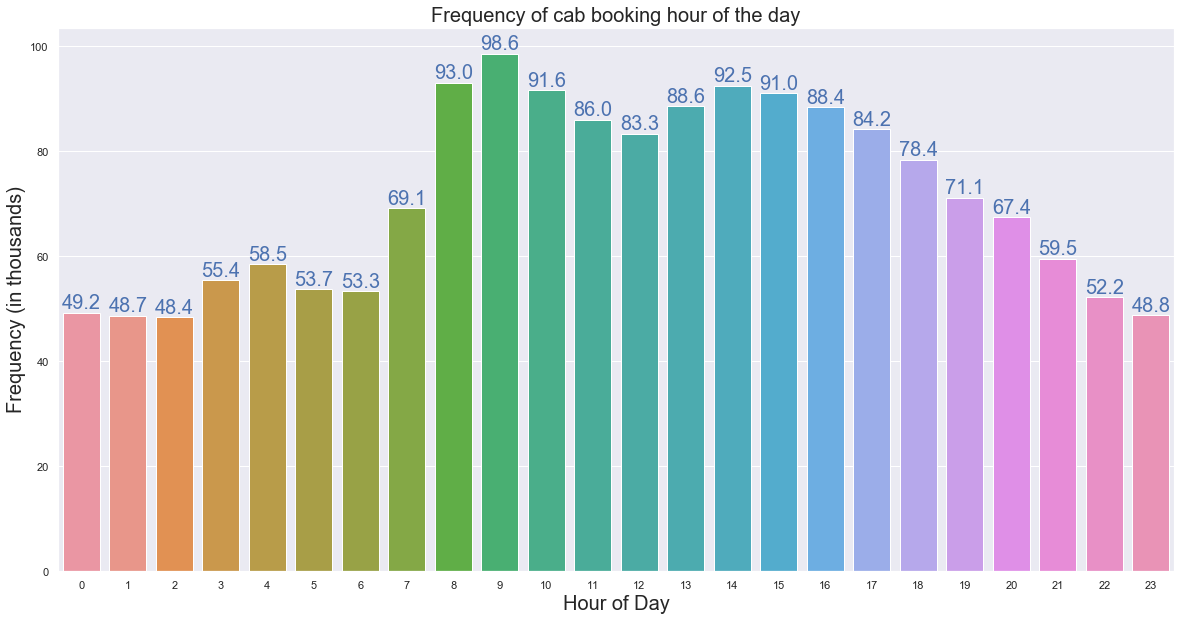

In [30]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=hour_of_day.HOUR, y=(hour_of_day.Count))
ax.set_xlabel("Hour of Day", size = 20)
ax.set_ylabel("Frequency (in thousands)", size = 20)
ax.set_title("Frequency of cab booking hour of the day", size = 20)
for i, v in enumerate(hour_of_day.sort_values("HOUR").Count.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', size=20, ha='center')

As we can see ride at 8:00 AM to 10: AM is high because people are going to work and evening it's getting low as people start to home at different time

In [31]:
cab_data_new = cap_data_copy[cap_data_copy.astype(str)['POLYLINE'] != '[]']

In [32]:
cab_poly_line = cab_data_new.POLYLINE

## Extracting the start, end, latitude, longitude and number of coordinates from the POLYLINE data

In [33]:
def extract_data(x):
    splitted = x[2:-2].split('],[')
    time_slots = len(splitted)
    if len(splitted) > 0 and len(splitted[-1].split(',')) > 1 and len(splitted[0].split(',')) > 1 :
        z,w = splitted[0].split(',')
        x,y = splitted[-1].split(',')
        return [float(z), float(w), float(x), float(y), int(time_slots)]
    else :
        return '0'

In [34]:
cab_data_new["lat_long_time"] = cab_data_new.POLYLINE.apply(extract_data)

In [35]:
cab_test_data = cab_test_data[cab_test_data["MISSING_DATA"] == False]

In [36]:
cab_test_data["lat_long_time"] = cab_test_data.POLYLINE.apply(extract_data)

## Add start, end, number of coordinates to the dataframe

In [37]:
cab_data_new["start_lat"] = cab_data_new.lat_long_time.apply(lambda item: item[0])
cab_data_new["start_long"] = cab_data_new.lat_long_time.apply(lambda item: item[1])
cab_data_new["end_lat"] = cab_data_new.lat_long_time.apply(lambda item: item[2])
cab_data_new["end_long"] = cab_data_new.lat_long_time.apply(lambda item: item[3])
cab_data_new["lat_long_count"] = cab_data_new.lat_long_time.apply(lambda item: item[4])

In [38]:
cab_test_data["start_lat"] = cab_test_data.lat_long_time.apply(lambda item: item[0])
cab_test_data["start_long"] = cab_test_data.lat_long_time.apply(lambda item: item[1])
cab_test_data["end_lat"] = cab_test_data.lat_long_time.apply(lambda item: item[2])
cab_test_data["end_long"] = cab_test_data.lat_long_time.apply(lambda item: item[3])
cab_test_data["lat_long_count"] = cab_test_data.lat_long_time.apply(lambda item: item[4])

In [39]:
cab_data_correct = cab_data_new[cab_data_new.MISSING_DATA == False]

## As there are only 10 records which contains missing data removing missing data from dataframe

In [40]:
cab_data_new.shape

(1704769, 21)

In [41]:
cab_data_correct.shape

(1704759, 21)

In [43]:
cab_data_missing = cab_data_new[cab_data_new.MISSING_DATA == True]

In [44]:
cab_data_missing.shape

(10, 21)

In [45]:
cab_data_correct["Time"] = cab_data_correct.lat_long_count*15/60

In [46]:
cab_test_data["Time"] = cab_test_data.lat_long_count*15/60

## Density distribution of cab trip time

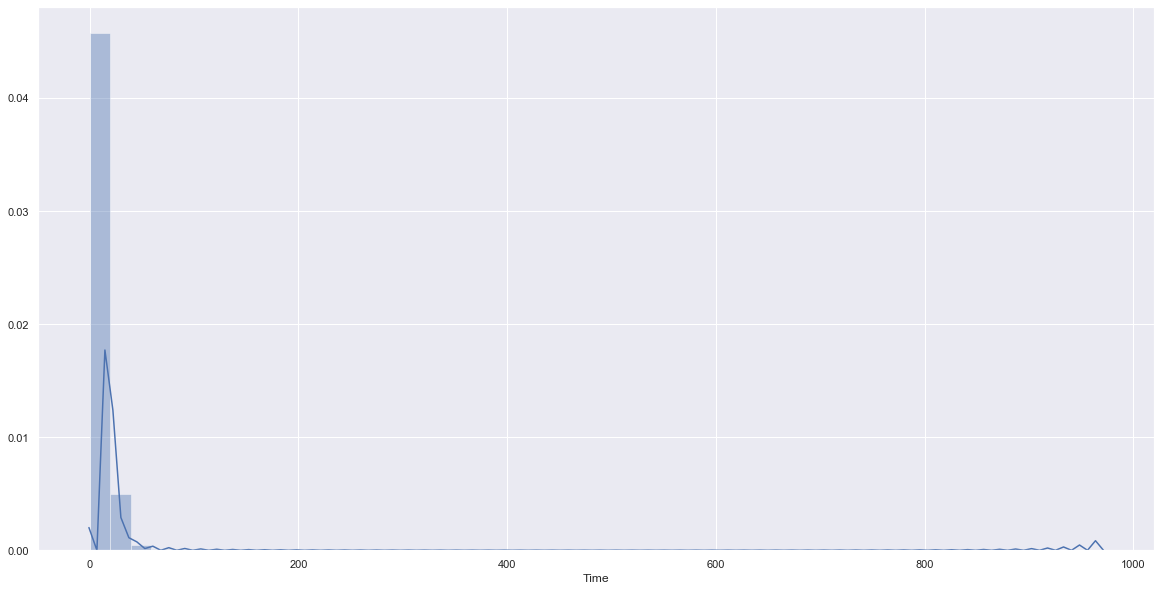

In [47]:
plt.figure(figsize=(20,10))
sns.distplot(cab_data_correct.Time)

In [48]:
travel_times = cab_data_correct.Time.value_counts().rename_axis("Travel Time").reset_index(name="Count")

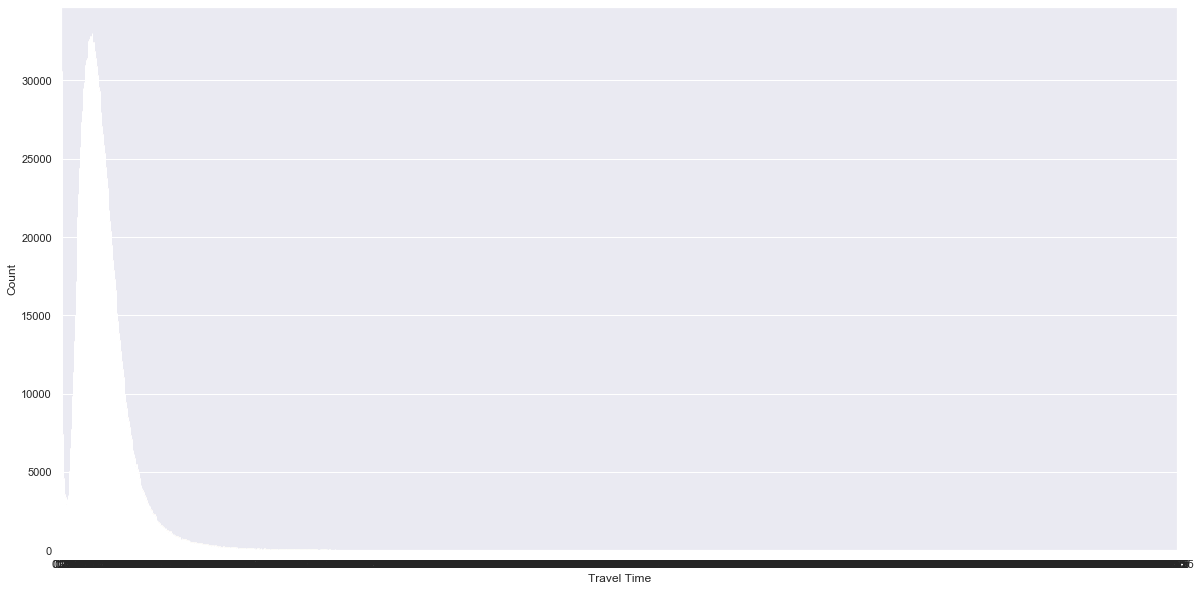

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(x=travel_times["Travel Time"], y=travel_times.Count)

In [50]:
cab_data_correct["Distance KM"] = cab_data_correct.lat_long_time.apply(lambda x: round(haversine((x[0], x[1]), (x[2], x[3])), 3))

In [51]:
cab_test_data["Distance KM"] = cab_test_data.lat_long_time.apply(lambda x: round(haversine((x[0], x[1]), (x[2], x[3])), 3))

## Cab Travel time vs Travel Distance scatter plot

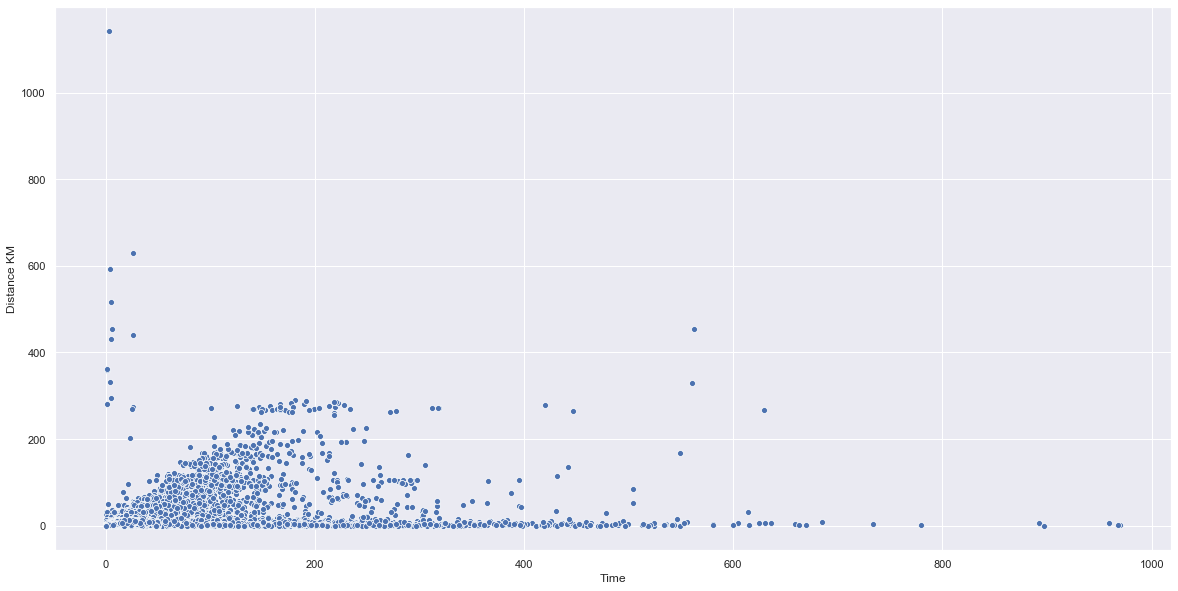

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=cab_data_correct.Time, y = cab_data_correct["Distance KM"])

In [105]:
week_data = cap_data_copy.WEEK.value_counts().rename_axis("WEEK").reset_index(name="Count")
week_data.Count = round(week_data.Count/10000,1)

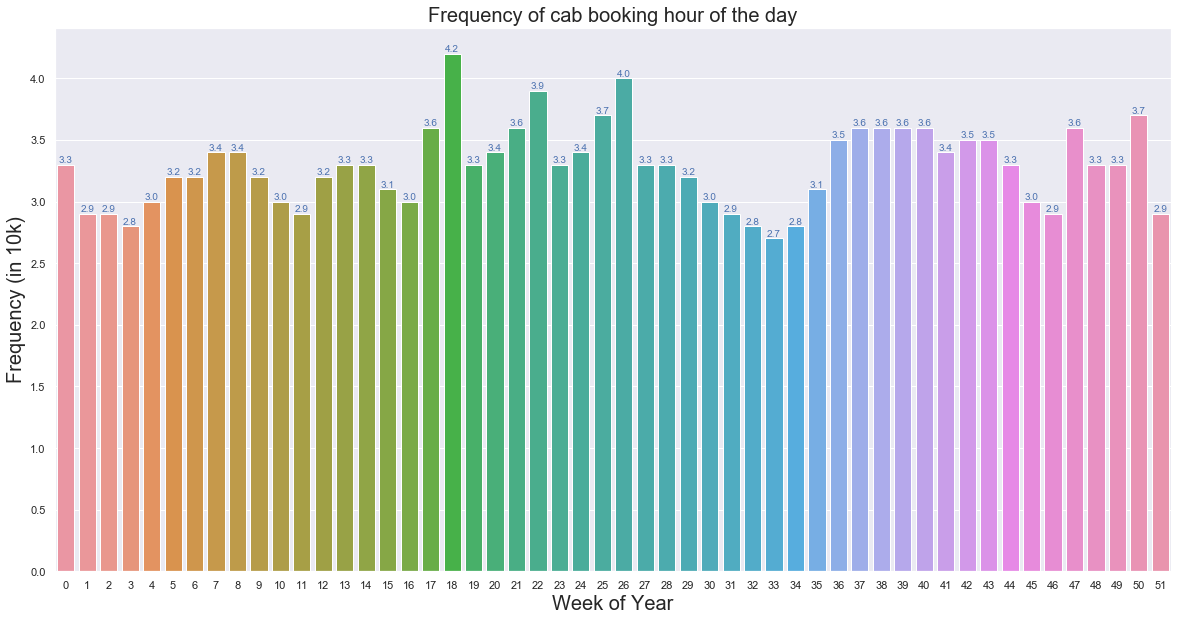

In [79]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=week_data.WEEK, y=(week_data.Count))
ax.set_xlabel("Week of Year", size = 20)
ax.set_ylabel("Frequency (in 10k)", size = 20)
ax.set_title("Frequency of cab booking hour of the day", size = 20)
for i, v in enumerate(week_data.sort_values("WEEK").Count.iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', size=10, ha='center')

In [122]:
cap_data_copy.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,WEEK,DAY,MONTH,HOUR,MINUTE,DATE_TIME,DAY NAME,YEAR,DATE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",26,0,7,0,0,2013-07-01 00:00:58,Monday,2013,2013-07-01
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",26,0,7,0,8,2013-07-01 00:08:23,Monday,2013,2013-07-01
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",26,0,7,0,2,2013-07-01 00:02:31,Monday,2013,2013-07-01
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",26,0,7,0,0,2013-07-01 00:00:54,Monday,2013,2013-07-01
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",26,0,7,0,4,2013-07-01 00:04:51,Monday,2013,2013-07-01


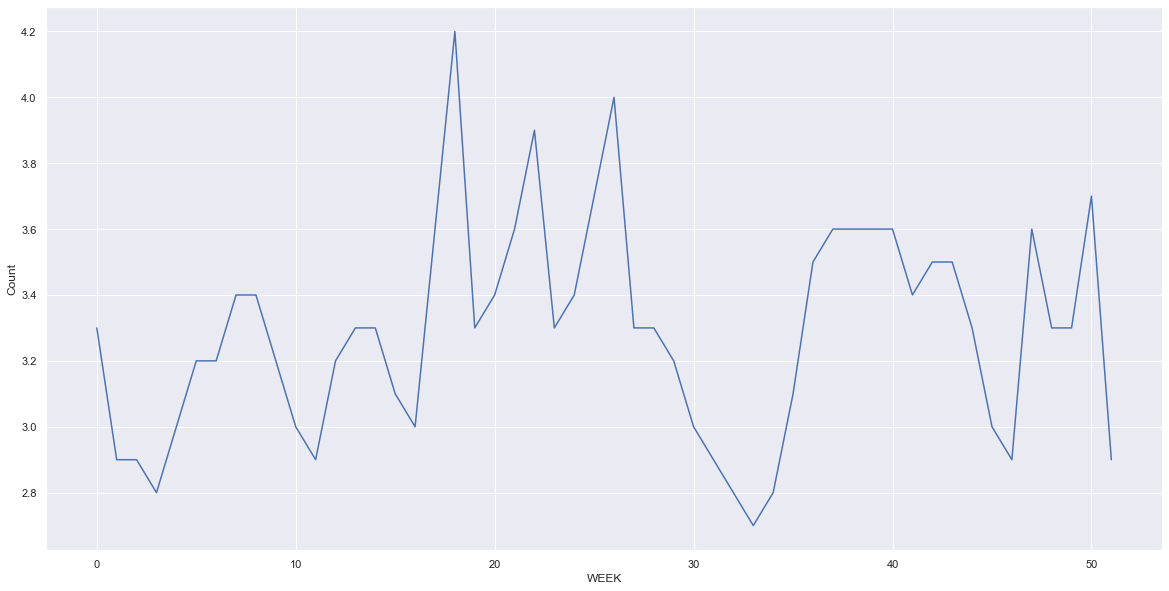

In [106]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=week_data.WEEK, y=(week_data.Count))

In [123]:
time_series_cab = cap_data_copy.sort_values("DATE_TIME").loc[:, ['DATE',  'YEAR', 'MONTH', 'WEEK', 'DAY', 'TRIP_ID']]

In [124]:
time_series_cab.head()

,DATE,YEAR,MONTH,WEEK,DAY,TRIP_ID
577,2013-07-01,2013,7,26,0,1372636853620000380
3,2013-07-01,2013,7,26,0,1372636854620000520
0,2013-07-01,2013,7,26,0,1372636858620000589
10,2013-07-01,2013,7,26,0,1372636875620000233
64,2013-07-01,2013,7,26,0,1372636896620000360


In [131]:
ts_cab_date = time_series_cab.groupby("DATE").agg('count').reset_index().loc[:, ["DATE", "TRIP_ID"]]

In [133]:
ts_cab_date.columns = ["DATE", "TRIPS"]

In [141]:
ts_cab_date = ts_cab_date.set_index("DATE")

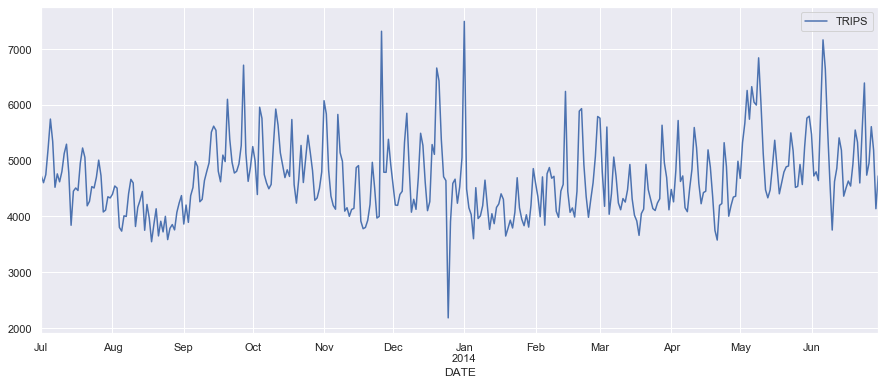

In [144]:
ts_cab_date.plot(figsize=(15, 6))

In [151]:
import statsmodels.api as sm
import itertools

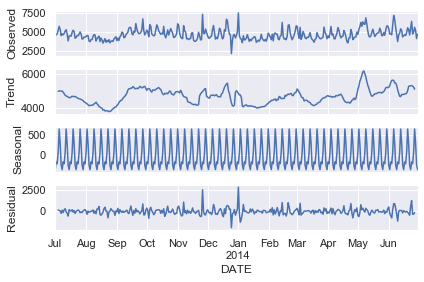

In [149]:
decomposition = sm.tsa.seasonal_decompose(ts_cab_date, model='additive')
fig = decomposition.plot()
plt.show()

In [152]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [160]:
result_AIC = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_cab_date,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            result_AIC.append(results.aic)
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7196.178755162074
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6732.442428124567
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5819.220917272682
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5458.485873527257
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5833.780660823606
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5681.87314430487
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5569.509829381435
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5459.083108559106
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6924.052362844268
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6245.2153433870435
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5710.656527084771
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5335.621294403644
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5843.366267509459
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5727.0237561811155
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5469.359106151824
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5337.557886566499
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5731.407027242652
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5545.171355729939
ARIMA(0, 

In [166]:
sorted_items = sorted(result_AIC)

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:y_forecasted.729593115792 is minimum

In [168]:
mod = sm.tsa.statespace.SARIMAX(ts_cab_date,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4837      0.051      9.500      0.000       0.384       0.584
ma.L1         -0.9362      0.026    -36.628      0.000      -0.986      -0.886
ar.S.L12      -0.1232      0.051     -2.428      0.015      -0.223      -0.024
ma.S.L12      -0.9994      0.053    -18.975      0.000      -1.103      -0.896
sigma2      3.261e+05   1.63e-07      2e+12      0.000    3.26e+05    3.26e+05


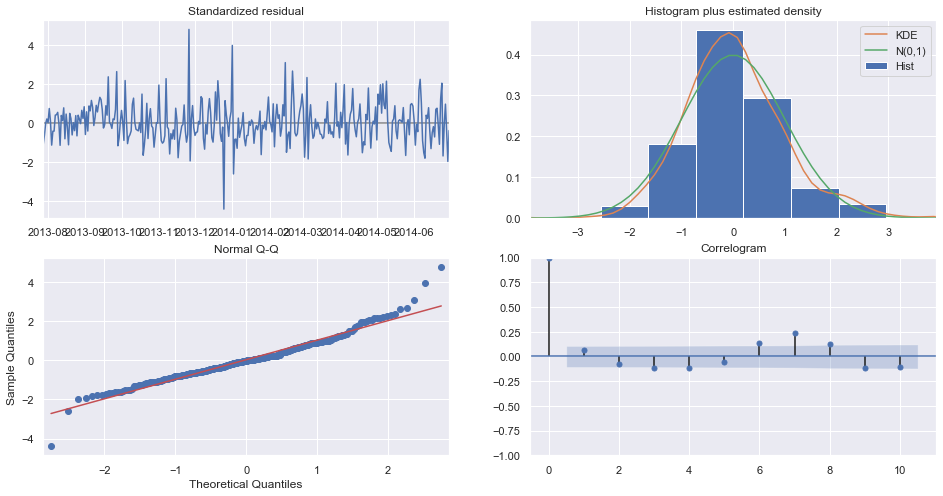

In [169]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

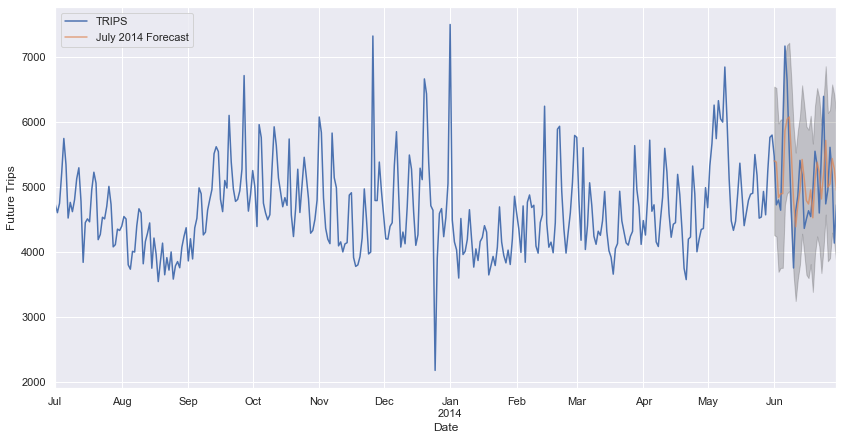

In [175]:
pred = results.get_prediction(start=pd.to_datetime('2014-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_cab_date['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='July 2014 Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Future Trips')
plt.legend()
plt.show()

In [214]:
y_forecasted = pred.predicted_mean
forcasted_y_dataframe = pd.DataFrame(y_forecasted, columns=["TRIPS"])
y_truth = ts_cab_date['2014-06-01':]
mse = ((forcasted_y_dataframe.TRIPS - y_truth.TRIPS) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 406516.78


In [218]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 637.59


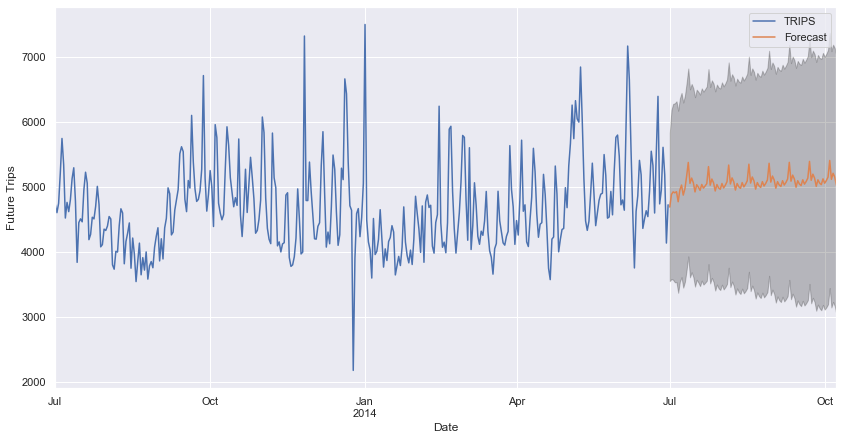

In [219]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts_cab_date.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Future Trips')
plt.legend()
plt.show()

In [109]:
from pylab import rcParams

# Taking Sample of 1 lac record as computing 1.7 million records restarting kernel as 100% memory getting utilised

In [53]:
cab_data_correct_sample = cab_data_correct.sample(n=100000, random_state=1)

In [54]:
end_lat_long = cab_data_correct_sample[["end_lat", "end_long"]]

In [55]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian

In [80]:
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', \
            metric='haversine').fit(np.radians(end_lat_long))

In [81]:
cluster_labels = db.labels_

In [82]:
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_clusters_

11

In [83]:
df_labels = pd.DataFrame(cluster_labels, columns=["cluster_label"])

In [84]:
clusters = df_labels.cluster_label.unique()

In [85]:
cab_data_correct_sample["Cluster"] = df_labels.cluster_label.values

## Origin of cab booking in sample data plotted on Porto City of Portugal

Text(0.5, 1.0, 'Starting Point of taxis in sample data')

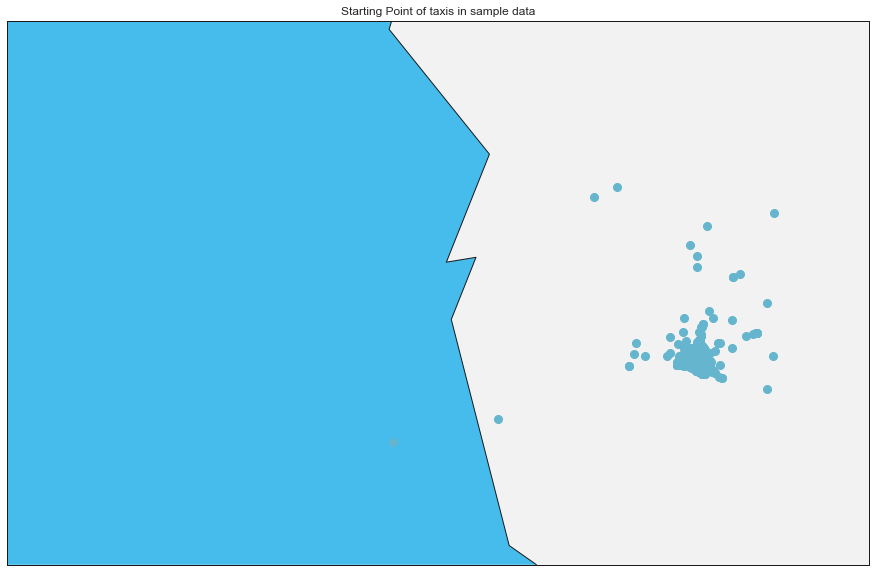

In [86]:
#llcrnlat => Lower Left Corner Latitude
#llcrnrlon => Lower Left Corner Longitude
#urcrnrlat => Upper right corner latitude
# westlimit=-10.18; southlimit=35.81; eastlimit=-5.99; northlimit=42.5
plt.figure(figsize=(20,10))
m = Basemap(projection='mill',
           llcrnrlat = -10.18,
           llcrnrlon = 35.81,
           urcrnrlat = -5.99,
           urcrnrlon = 42.5,
           resolution = 'c')
m.drawcoastlines()
m.drawcountries(color='yellow')
# m.fillcontinents()

m.drawmapboundary(fill_color='#f2f2f2')
m.fillcontinents(color='#46bcec',lake_color='#46bcec')


for i, coord in cab_data_correct_sample.iterrows():
    xpt, ypt = m(coord["start_long"], coord["start_lat"])
    m.plot(xpt, ypt, 'co', markersize=8)


plt.title("Starting Point of taxis in sample data")

## Orgin of destination of cabs in sample data

Text(0.5, 1.0, 'End Point of taxis in sample data')

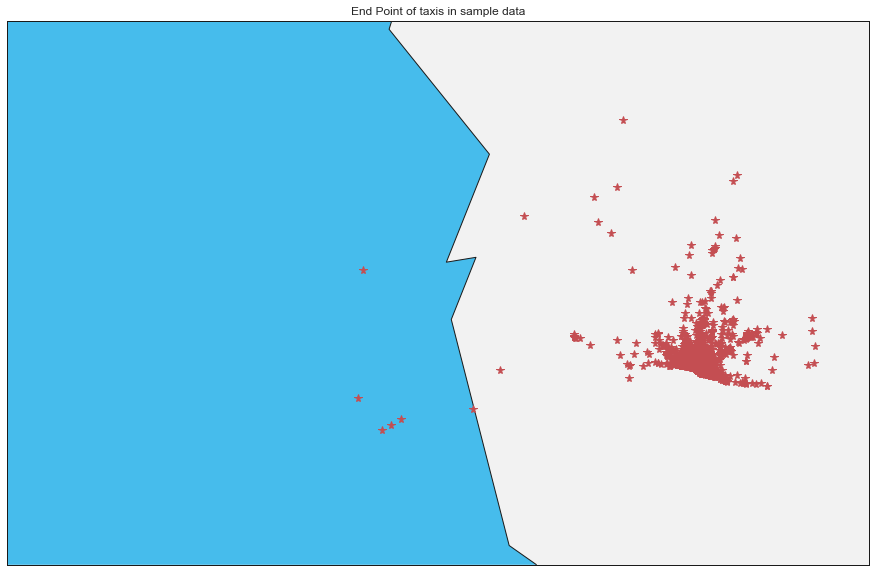

In [87]:
#llcrnlat => Lower Left Corner Latitude
#llcrnrlon => Lower Left Corner Longitude
#urcrnrlat => Upper right corner latitude
# westlimit=-10.18; southlimit=35.81; eastlimit=-5.99; northlimit=42.5
plt.figure(figsize=(20,10))
m = Basemap(projection='mill',
           llcrnrlat = -10.18,
           llcrnrlon = 35.81,
           urcrnrlat = -5.99,
           urcrnrlon = 42.5,
           resolution = 'c')
m.drawcoastlines()
m.drawcountries(color='yellow')
# m.fillcontinents()

m.drawmapboundary(fill_color='#f2f2f2')
m.fillcontinents(color='#46bcec',lake_color='#46bcec')


for i, coord in cab_data_correct_sample.iterrows():
    xpt, ypt = m(coord["end_long"], coord["end_lat"])
    m.plot(xpt, ypt, 'r*', markersize=8)


plt.title("End Point of taxis in sample data")

In [88]:
len(clusters)

12

In [89]:
colors_list = sns.color_palette("Set1", n_colors=12, desat=.5).as_hex()

In [90]:
cluster_color_map = {}

for cluster, color in zip(clusters, colors_list):
    cluster_color_map[cluster] = color

In [91]:
cluster_color_map[-1]

'#577b98'

## Performed Clustering using DBSCAN and showed result on the Porto map

Text(0.5, 1.0, 'Clustering Destination point')

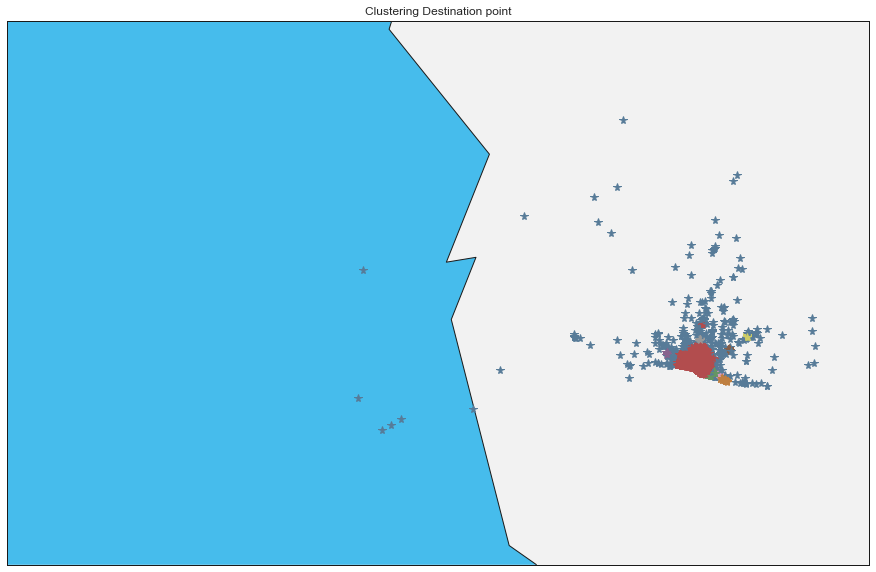

In [92]:
plt.figure(figsize=(20,10))
m = Basemap(projection='mill',
           llcrnrlat = -10.18,
           llcrnrlon = 35.81,
           urcrnrlat = -5.99,
           urcrnrlon = 42.5,
           resolution = 'c')
m.drawcoastlines()
m.drawcountries(color='yellow')
# m.fillcontinents()

m.drawmapboundary(fill_color='#f2f2f2')
m.fillcontinents(color='#46bcec',lake_color='#46bcec')


for i, coord in cab_data_correct_sample.iterrows():
    xpt, ypt = m(coord["end_long"], coord["end_lat"])
    
    m.plot(xpt, ypt, marker = '*', color = cluster_color_map[coord["Cluster"]], markersize=8)


plt.title("Clustering Destination point")

In [93]:
cab_data_model = cab_data_correct.loc[:, ['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'DAY_TYPE', 'WEEK', 'DAY','MONTH', 'HOUR', 'MINUTE', 'start_lat','start_long', 'end_lat', 'end_long', 'lat_long_count', 'Time','Distance KM']]

In [94]:
X_train = cab_data_model.loc[:, ['TAXI_ID', 'WEEK', 'DAY','MONTH', 'HOUR', 'MINUTE', 'start_lat','start_long', 'Time','Distance KM']]

In [95]:
X_test = cab_test_data.loc[:, ['TAXI_ID', 'WEEK', 'DAY','MONTH', 'HOUR', 'MINUTE', 'start_lat','start_long', 'Time','Distance KM']]

In [96]:
y_train = cab_data_model.loc[:, ["end_lat", "end_long"]]

In [97]:
y_test = cab_test_data.loc[:, ["end_lat", "end_long"]]

In [98]:
regressor = DecisionTreeRegressor(random_state=0)

In [99]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [100]:
y_pred = regressor.predict(X_test)

In [101]:
predicted_df = pd.DataFrame(y_pred, columns=["dest_lat", "dest_long"])

### Predicted values and test values

## Predicted values and test values scatterplot

Text(0, 0.5, 'Latitude')

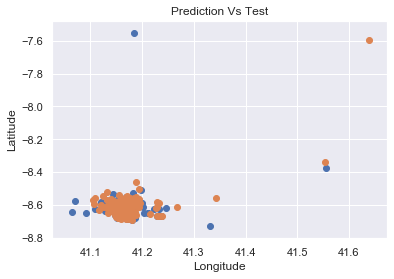

In [102]:
plt.scatter(y_test.end_long, y_test.end_lat)
plt.scatter(predicted_df.dest_long, predicted_df.dest_lat)
plt.title("Prediction Vs Test")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

## Predicted and Test data values plotted on Porto Map

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Portugal Map')

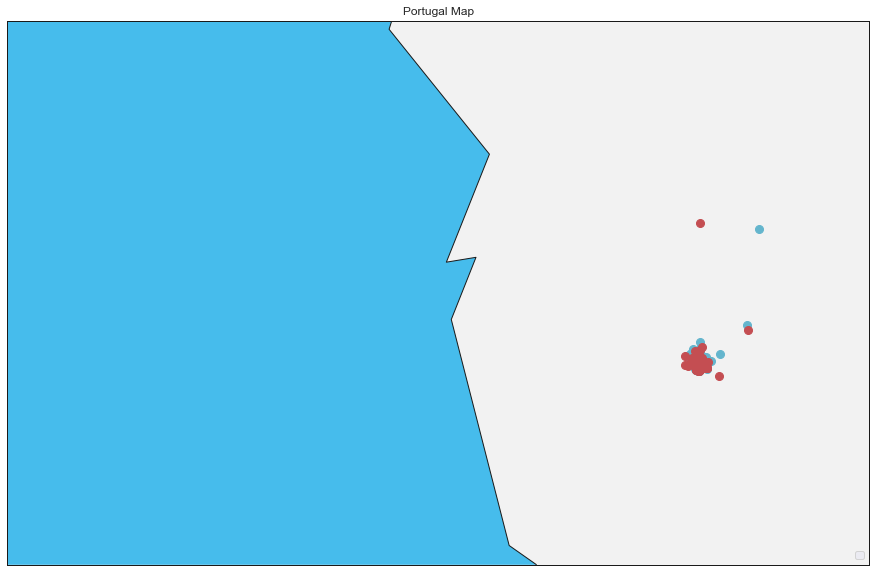

In [103]:
#llcrnlat => Lower Left Corner Latitude
#llcrnrlon => Lower Left Corner Longitude
#urcrnrlat => Upper right corner latitude
# westlimit=-10.18; southlimit=35.81; eastlimit=-5.99; northlimit=42.5
plt.figure(figsize=(20,10))
m = Basemap(projection='mill',
           llcrnrlat = -10.18,
           llcrnrlon = 35.81,
           urcrnrlat = -5.99,
           urcrnrlon = 42.5,
           resolution = 'c')
m.drawcoastlines()
m.drawcountries(color='yellow')
# m.fillcontinents()

m.drawmapboundary(fill_color='#f2f2f2')
m.fillcontinents(color='#46bcec',lake_color='#46bcec')


for coord in y_pred:
    xpt, ypt = m(coord[1], coord[0])
    m.plot(xpt, ypt, 'co', markersize=8)

for index, row in y_test.iterrows():
    xpt, ypt = m(row["end_long"], row["end_lat"])
    m.plot(xpt, ypt, 'ro', markersize=8)
    
plt.legend(loc=4)
plt.title("Portugal Map")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test.to_numpy(), y_pred))
print(classification_report(y_test, y_pred))